In [1]:
import abundance_matching

import betterplotlib as bpl
import numpy as np

bpl.presentation_style()

In [2]:
bpl.presentation_style()

In [3]:
u = abundance_matching.UniverseMachine(1E12, 1E11, 0)

In [4]:
u.smhm_table['1.002312']

HM(0),Med_All(1),Err+(2),Err-(3),Med_Cen(4),Err+(5),Err-(6),Med_Cen_SF(7),Err+(8),Err-(9),Med_Cen_Q(10),Err+(11),Err-(12),Med_Sat(13),Err+(14),Err-(15),Med_SF(16),Err+(17),Err-(18),Med_Q(19),Err+(20),Err-(21),True_Med_All(22),Err+(23),Err-(24),True_Cen(25),Err+(26),Err-(27),True_Cen_SF(28),Err+(29),Err-(30),True_Cen_Q(31),Err+(32),Err-(33),True_Sat(34),Err+(35),Err-(36),True_SF(37),Err+(38),Err-(39),True_Q(40),Err+(41),Err-(42)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
9.1,-4.494999,4.494999,0.0,-4.494999,4.494999,0.0,-4.494999,4.494999,0.0,0.0,0.0,0.0,0.0,0.0,4.494996,-4.494999,4.494999,0.0,0.0,0.0,0.0,-4.494999,4.494999,0.0,-4.494999,4.494999,0.0,-4.494999,4.494999,0.0,0.0,0.0,0.0,0.0,0.0,4.494996,-4.494999,4.494999,0.0,0.0,0.0,0.0
9.3,-4.494998,1.2e-05,2e-06,-4.494998,1.1e-05,1e-06,-4.494998,1.1e-05,1e-06,-4.494263,4.494263,0.00069,-4.494992,2.6e-05,5e-06,-4.494998,1.3e-05,2e-06,-4.494174,4.494174,0.000779,-4.494998,9e-06,2e-06,-4.494998,8e-06,1e-06,-4.494998,1.1e-05,2e-06,-4.494128,4.494128,0.000827,-4.494996,2e-05,1e-06,-4.494998,1.2e-05,2e-06,-4.494178,4.494178,0.000779
9.5,-4.494905,0.000248,7.2e-05,-4.494913,0.000234,6.5e-05,-4.494921,0.000237,6.3e-05,-4.492802,4.492802,0.0017,-4.4948,0.000502,0.000153,-4.49491,0.00025,7.1e-05,-4.492906,1.132906,0.001575,-4.494913,0.000188,7e-05,-4.494921,0.000167,6.4e-05,-4.494929,0.000168,6.1e-05,-4.492776,4.492776,0.001693,-4.494817,0.000389,0.000146,-4.494919,0.000184,6.9e-05,-4.492835,4.492835,0.001634
9.7,-4.461691,0.074112,0.031896,-4.464714,0.068202,0.02896,-4.46514,0.066608,0.02858,-4.067621,0.515715,0.234965,-4.384753,0.136333,0.079605,-4.462125,0.072599,0.031514,-4.068707,0.511458,0.231571,-4.463289,0.049072,0.030662,-4.466269,0.045802,0.027748,-4.466697,0.045728,0.027367,-4.070182,0.516056,0.233225,-4.387415,0.09573,0.088964,-4.463726,0.048825,0.030272,-4.071117,0.526894,0.231697
9.9,-3.789787,0.103411,0.201411,-3.813251,0.102545,0.204792,-3.814991,0.103267,0.205705,-3.526384,0.301242,0.184669,-3.592118,0.080986,0.180716,-3.791706,0.102924,0.201887,-3.492774,0.289124,0.179642,-3.79426,0.070513,0.2575,-3.817855,0.069741,0.261002,-3.819667,0.070957,0.261865,-3.52729,0.287128,0.192049,-3.595227,0.06065,0.234295,-3.796223,0.07215,0.261065,-3.493212,0.292764,0.18859
10.1,-3.374289,0.04297,0.170815,-3.401626,0.043973,0.173078,-3.402734,0.044818,0.171419,-3.223874,0.167977,0.132328,-3.208457,0.044869,0.147945,-3.376028,0.043244,0.169588,-3.165777,0.186321,0.132243,-3.379339,0.036633,0.208364,-3.40636,0.034574,0.212059,-3.407479,0.035323,0.212327,-3.232202,0.172403,0.148271,-3.213817,0.039357,0.189278,-3.381106,0.03692,0.210836,-3.173654,0.199376,0.131137
10.3,-3.13622,0.023013,0.152712,-3.167731,0.021709,0.156777,-3.169031,0.021883,0.155809,-3.038357,0.108789,0.110581,-2.9861,0.021593,0.13448,-3.13876,0.022353,0.153695,-2.96474,0.18757,0.111049,-3.141433,0.018872,0.193938,-3.172791,0.016476,0.200985,-3.174077,0.01675,0.19977,-3.045682,0.112787,0.144055,-2.991092,0.020428,0.179039,-3.143972,0.020244,0.192003,-2.972538,0.185967,0.103469
10.5,-2.930211,0.0,0.136239,-2.964034,-0.002026,0.141237,-2.965317,-0.001994,0.14101,-2.881353,0.09183,0.092084,-2.785308,0.001656,0.114646,-2.933907,0.0,0.135299,-2.775238,0.211621,0.101775,-2.934972,0.007893,0.18074,-2.968697,0.007662,0.188677,-2.969951,0.008138,0.189019,-2.890918,0.089573,0.118542,-2.790143,0.013724,0.158838,-2.938714,0.007076,0.182201,-2.780872,0.221182,0.093885
10.7,-2.740482,-0.014568,0.110318,-2.782,-0.017277,0.119456,-2.783359,-0.016172,0.119637,-2.72226,0.084219,0.08736,-2.577202,-0.003634,0.082211,-2.746782,-0.015158,0.110933,-2.580641,0.173739,0.074911,-2.745738,0.001528,0.160136,-2.787058,0.00129,0.173833,-2.788343,0.000441,0

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


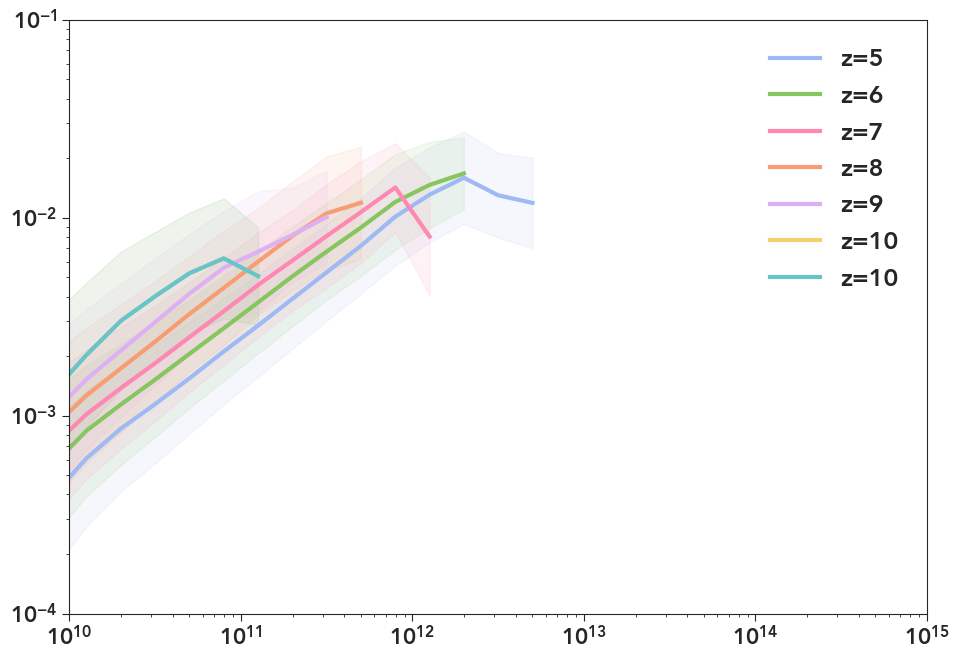

In [5]:
fig, ax = bpl.subplots()

for idx, z in enumerate(np.arange(5, 12)):
    z_smhm, masses, smhm, hi_lim, lo_lim = u.get_smhm(z, "All")
    
    ax.plot(masses, smhm, label="z={:.0f}".format(z_smhm), c=bpl.color_cycle[idx])
    ax.fill_between(x=masses, y1=lo_lim, y2=hi_lim, color=bpl.color_cycle[idx], alpha=0.1)
    ax.set_xscale("log")
    ax.set_yscale("log")
    
    ax.legend()
    ax.set_limits(1E10, 1E15, 0.0001, 0.1)

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


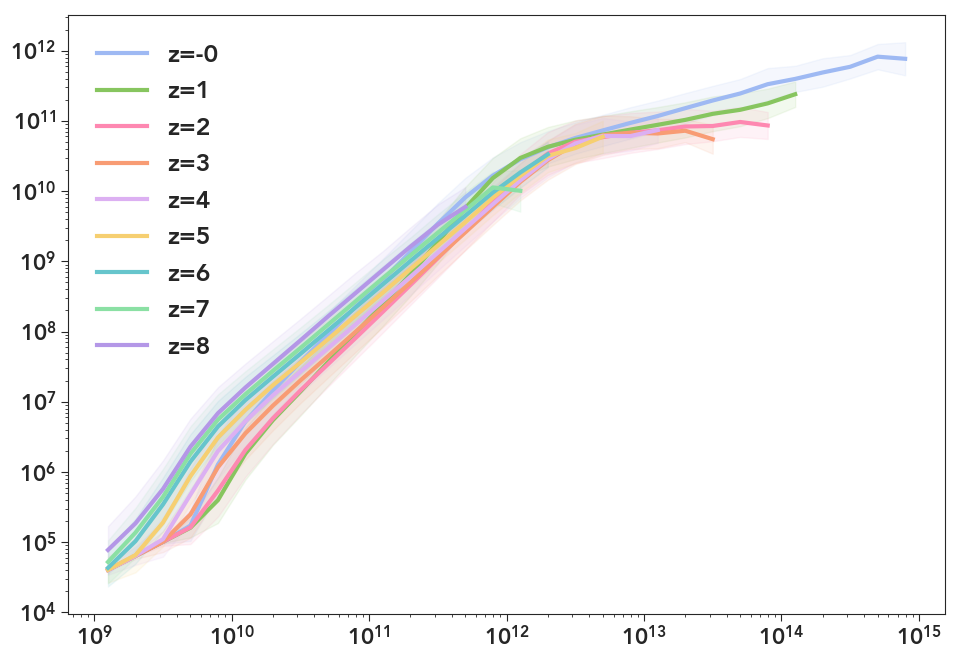

In [6]:
fig, ax = bpl.subplots()

for idx, z in enumerate(np.arange(0, 9)):
    z_smhm, masses, smhm, hi_lim, lo_lim = u.get_smhm(z, "All")
    
    s_mass = masses * smhm
    sm_up = masses * hi_lim
    sm_down = masses * lo_lim
    
    ax.plot(masses, s_mass, label="z={:.0f}".format(z_smhm), c=bpl.color_cycle[idx])
    ax.fill_between(x=masses, y1=sm_down, y2=sm_up, color=bpl.color_cycle[idx], alpha=0.1)
    ax.set_xscale("log")
    ax.set_yscale("log")
    
    ax.legend()

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


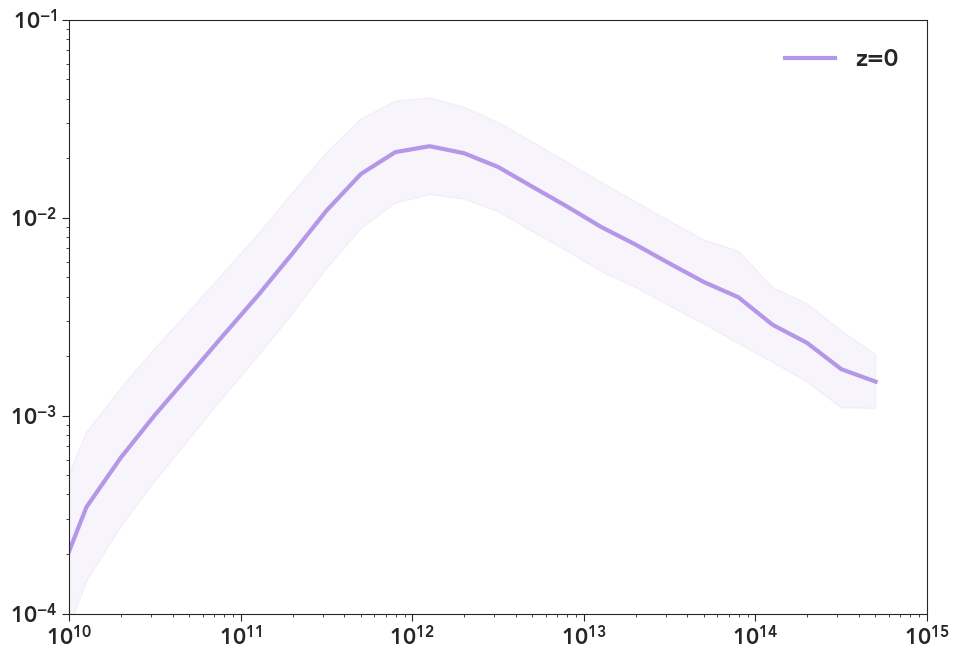

In [7]:
fig, ax = bpl.subplots()

z_smhm, masses, smhm, hi_lim, lo_lim = u.get_smhm(0.1, "All")

ax.plot(masses, smhm, label="z={:.0f}".format(z_smhm), c=bpl.color_cycle[idx])
ax.fill_between(x=masses, y1=lo_lim, y2=hi_lim, color=bpl.color_cycle[idx], alpha=0.1)
ax.set_xscale("log")
ax.set_yscale("log")

ax.legend()
ax.set_limits(1E10, 1E15, 0.0001, 0.1)

In [8]:
u.smhm_table['0.089373']

HM(0),Med_All(1),Err+(2),Err-(3),Med_Cen(4),Err+(5),Err-(6),Med_Cen_SF(7),Err+(8),Err-(9),Med_Cen_Q(10),Err+(11),Err-(12),Med_Sat(13),Err+(14),Err-(15),Med_SF(16),Err+(17),Err-(18),Med_Q(19),Err+(20),Err-(21),True_Med_All(22),Err+(23),Err-(24),True_Cen(25),Err+(26),Err-(27),True_Cen_SF(28),Err+(29),Err-(30),True_Cen_Q(31),Err+(32),Err-(33),True_Sat(34),Err+(35),Err-(36),True_SF(37),Err+(38),Err-(39),True_Q(40),Err+(41),Err-(42)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
9.1,-4.032434,0.418883,0.388245,-4.033288,0.418961,0.387894,-4.033288,0.431321,0.387894,0.0,0.0,0.0,-3.900319,0.442426,0.413154,-4.032434,0.431469,0.388245,0.0,0.0,0.0,-4.002478,0.440692,0.407175,-4.003428,0.440551,0.407138,-4.003428,0.440551,0.407138,0.0,0.0,0.0,-3.862319,0.442561,0.432717,-4.002478,0.440692,0.407175,0.0,0.0,0.0
9.3,-3.907657,0.330411,0.344949,-3.90847,0.329489,0.344802,-3.90847,0.347357,0.344802,0.0,0.0,0.0,-3.795253,0.372672,0.350807,-3.907657,0.3474,0.344949,0.0,0.0,0.0,-3.876048,0.334076,0.370368,-3.876892,0.333923,0.370284,-3.876892,0.333923,0.370284,0.0,0.0,0.0,-3.72157,0.350461,0.398793,-3.876048,0.334076,0.370368,0.0,0.0,0.0
9.5,-3.624369,0.257511,0.304299,-3.625715,0.257251,0.304125,-3.625715,0.282918,0.304125,0.0,0.0,0.0,-3.474483,0.289902,0.316083,-3.624369,0.28323,0.304299,0.0,0.0,0.0,-3.583692,0.28258,0.325867,-3.584996,0.282426,0.32557,-3.584996,0.282787,0.32557,0.0,0.0,0.0,-3.434945,0.294744,0.347647,-3.583692,0.282709,0.325867,0.0,0.0,0.0
9.7,-3.22254,0.242196,0.266233,-3.223325,0.242007,0.26573,-3.223325,0.251233,0.26573,0.0,0.0,0.0,-3.166046,0.225747,0.293788,-3.22254,0.250968,0.266233,0.0,0.0,0.0,-3.184086,0.248721,0.303263,-3.185031,0.249157,0.302671,-3.185031,0.259123,0.29908,0.0,0.0,0.0,-3.116385,0.235036,0.328179,-3.184086,0.258884,0.299815,0.0,0.0,0.0
9.9,-2.927912,0.201905,0.269847,-2.929518,0.202786,0.268772,-2.929518,0.210964,0.268772,0.0,0.0,0.0,-2.844049,0.160863,0.314839,-2.927912,0.210005,0.269847,0.0,0.0,0.0,-2.884612,0.212242,0.274071,-2.886574,0.213719,0.273284,-2.886574,0.213779,0.273284,0.0,0.0,0.0,-2.808594,0.188183,0.307297,-2.884612,0.212479,0.274071,0.0,0.0,0.0
10.1,-2.737132,0.161521,0.284562,-2.737732,0.161713,0.283713,-2.737732,0.177403,0.283713,0.0,0.0,0.0,-2.711461,0.135006,0.312236,-2.737132,0.175231,0.284562,0.0,0.0,0.0,-2.692835,0.169921,0.294131,-2.693244,0.171942,0.29359,-2.693244,0.193317,0.29359,0.0,0.0,0.0,-2.668956,0.140253,0.321556,-2.692835,0.192744,0.294131,0.0,0.0,0.0
10.3,-2.567449,0.119427,0.292146,-2.568148,0.119024,0.291721,-2.568148,0.128619,0.287558,0.0,0.0,0.0,-2.527072,0.122731,0.311895,-2.567449,0.126848,0.287626,0.0,0.0,0.0,-2.520946,0.139861,0.305766,-2.522491,0.141343,0.305189,-2.522491,0.154002,0.305189,0.0,0.0,0.0,-2.484916,0.10894,0.329352,-2.520946,0.149989,0.305766,0.0,0.0,0.0
10.5,-2.43931,0.122202,0.336735,-2.438873,0.122082,0.336346,-2.438873,0.122082,0.334063,0.0,0.0,0.0,-2.467096,0.116453,0.353521,-2.43931,0.122202,0.333002,0.0,0.0,0.0,-2.3969,0.091271,0.338898,-2.395923,0.092366,0.339284,-2.395923,0.102248,0.339284,0.0,0.0,0.0,-2.398095,0.081619,0.377588,-2.3969,0.100403,0.338898,0.0,0.0,0.0
10.7,-2.311818,0.115736,0.402623,-2.320098,0.117871,0.401006,-2.320098,0.117871,0.400444,0.0,0.0,0.0,-2.116323,0.109203,0.424896,-2.311818,0.115736,0.400526,0.0,0.0,0.0,-2.280274,0.098446,0.43303,-2.287417,0.103025,0.428215,-2.287417,0.103025,0.428215,0.0,0.0,0.0,-2.177482,0.190603,0.364787,-2.280274,0.098446,0.43303,0.0,0.0,0.0


In [9]:
col = u.smhm_table['0.089373']["HM(0)"]

In [10]:
col.data

array([ 9.1,  9.3,  9.5,  9.7,  9.9, 10.1, 10.3, 10.5, 10.7, 10.9, 11.1,
       11.3, 11.5, 11.7, 11.9, 12.1, 12.3, 12.5, 12.7, 12.9, 13.1, 13.3,
       13.5, 13.7, 13.9, 14.1, 14.3, 14.5, 14.7, 14.9, 15.1, 15.3, 15.5,
       15.7, 15.9])